<a href="https://colab.research.google.com/github/seulch/seulch.github.io/blob/main/NetsPresso_Tutorial(with_Compressor)%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
  <a href="https://netspresso.ai/?utm_source=colab_bp&utm_medium=banner_py&utm_campaign=np_renew" target="_blank">
  <img src="https://netspresso-docs-imgs.s3.ap-northeast-2.amazonaws.com/imgs/banner/NetsPresso2.0_banner.png"/>
</div>

<div align="center">
  ☀️ NetsPresso Model Zoo ☀️ <br>
      <a href="https://github.com/Nota-NetsPresso/ModelZoo-YOLOFastest-for-ARM-U55-M85"> YOLO Fastest </a>
    | <a href="https://github.com/Nota-NetsPresso/yolox_nota"> YOLOX </a>
    | <a href="https://github.com/Nota-NetsPresso/ultralytics_nota"> YOLOv8 </a>
    | <a href="https://github.com/Nota-NetsPresso/ModelZoo-YOLOv7"> YOLOv7 </a>
    | <a href="https://github.com/Nota-NetsPresso/yolov5_nota"> YOLOv5 </a>
    | <a href="https://github.com/Nota-NetsPresso/PIDNet_nota"> PIDNet </a>     
    | <a href="https://github.com/Nota-NetsPresso/pytorch-cifar-models_nota"> PyTorch-CIFAR-Models</a>
</div>
</br>

<div align="center">
  🌟 STMicro x NetsPresso 🌟 <br>
      <a href="https://github.com/STMicroelectronics/stm32ai-modelzoo"> STM32 model zoo</a>
</div>
</br>

<div align="center">
    <a href="https://www.python.org/downloads/" target="_blank"><img src="https://img.shields.io/badge/python-3.8%20%7C%203.9%20%7C%203.10-blue?style=flat&logo=python&logoColor=blue"/>
    <a href="https://pytorch.org/" target="_blank"><img src="https://img.shields.io/badge/PyTorch-1.11.x ~ 1.13.x.-EE4C2C?style=flat&logo=pytorch&logoColor=#EE4C2C"/></a>
    <a href="https://www.tensorflow.org/install/pip" target="_blank"><img src="https://img.shields.io/badge/TensorFlow-2.3.x ~ 2.8.x.-FF6F00?style=flat&logo=tensorflow&logoColor=#FF6F00&link=https://www.tensorflow.org/install/pip"/></a>
    <a href="https://netspresso.ai/?utm_source=colab_bp&utm_medium=badge_py&utm_campaign=np_renew"><img src="https://img.shields.io/badge/NetsPresso-Open in Website-1BD2EB?style=flat&link=https://netspresso.ai/"/></a>
</div>
</br>

# Before starting tutorial

To get started with NetsPresso, you'll need to sign up [here](https://account.netspresso.ai/signup).

In this tutorial, we will guide you through the process of optimizing an AI model using NetsPresso.

This tutorial requires a total of **375 credits** to complete.

The tutorial includes the following steps:

1. Training a YOLOX detection model using the Trainer.
2. Benchmarking the trained model using the Converter and Benchmarker.
3. Optimizing the trained model to meet a specified target latency with the Compressor.
4. Retraining the compressed model that meets the target latency using the Trainer.
5. Comparing the performance between the original model and the compressed model.

## Guide to Credit Consumption by Module

<div align="center">
<table width="90%">
  <tr>
      <th>Module</th>
      <th>Feature</th>
      <th>Credit</th>
  </tr>
  <tr>
      <td align="center" rowspan="2">Compressor</td>
      <td align="center">Automatic compression</td>
      <td align="center">25</td>
  </tr>
  <tr>
      <td align="center">Advanced compression</td>
      <td align="center">50</td>
  </tr>
  <tr>
      <td align="center">Converter</td>
      <td align="center">Convert</td>
      <td align="center">50</td>
  </tr>
  <tr>
      <td align="center">Benchmarker</td>
      <td align="center">Benchmark</td>
      <td align="center">25</td>
  </tr>
</table>
<div>

# Install NetsPresso

## Prerequisites

- Python `3.8` | `3.9` | `3.10` | `3.11`
- PyTorch `1.13.0` (recommended) (compatible with: `1.13.x` - `2.0.1`)
- TensorFlow `2.8.0` (recommended) (compatible with: `2.3.x` - `2.8.x`)

To use **editable mode** or **docker**, see [INSTALLATION.md](https://github.com/Nota-NetsPresso/PyNetsPresso/blob/develop/INSTALLATION.md).

## Install with PyPI (stable)

In [ ]:
!python --version

Python 3.11.12


In [ ]:
!pip install netspresso

If you see a "Restart Session" notification like the one in the image below, please click the "Restart Session" button and proceed from the next cell.

<img src="https://drive.google.com/uc?id=1LszAN_Rftrg_QXH1ykXJX88A6ECwoNxe" width="600" height="300">


# Login NetsPresso

To use the NetsPresso, please enter the email and password registered in [NetsPresso](https://netspresso.ai/?utm_source=colab_bp&utm_medium=text_signup2&utm_campaign=np_renew).

In [ ]:
from netspresso import NetsPresso

EMAIL = "<YOUR_EMAIL>"
PASSWORD = "<YOUR_PASSWORD>"
netspresso = NetsPresso(email=EMAIL, password=PASSWORD)

2025-05-17 12:35:13.013 | INFO     | netspresso.clients.auth.v2.client:login:35 - Login successfully
2025-05-17 12:35:13.742 | INFO     | netspresso.clients.auth.v2.client:get_user_info:44 - Successfully got user information


# 1. Train the model(using **YOLOX**)
--------------------------------------------------

We will train an object detection model using **YOLOX**.

Following the training, we'll measure the latency on the **Raspberry Pi 4B**.

## 1-1. Download Dataset

The dataset was sourced from the provided [link](https://www.kaggle.com/code/valentynsichkar/traffic-signs-detection-by-yolo-v3-opencv-keras/input).

We downloaded the Traffic Signs Dataset in YOLO format and utilized it for training.


In [ ]:
!wget https://netspresso-github.s3.ap-northeast-2.amazonaws.com/traffic-sign.zip
!unzip traffic-sign.zip

## 1-2. Train the model

Currently, Trainer supports training pipelines about three computer vision tasks:

- IMAGE_CLASSIFICATION
- OBJECT_DETECTION
- SEMANTIC_SEGMENTATION

In [ ]:
from netspresso.enums import Task
from netspresso.trainer.augmentations import Resize, Pad, ToTensor, Normalize
from netspresso.trainer.optimizers import AdamW
from netspresso.trainer.schedulers import CosineAnnealingWarmRestartsWithCustomWarmUp

IMG_SIZE=512

# 1. Declare trainer
trainer = netspresso.trainer(task=Task.OBJECT_DETECTION)
trainer.set_dataset_config(
    name="traffic_sign_config_example",
    root_path="./traffic-sign",
    train_image="images/train",
    train_label="labels/train",
    valid_image="images/valid",
    valid_label="labels/valid",
    id_mapping=["prohibitory", "danger", "mandatory", "other"],
)
trainer.set_model_config(model_name="YOLOX-S", img_size=IMG_SIZE)
trainer.set_augmentation_config(
    train_transforms=[Resize(), Pad(fill=114), ToTensor(), Normalize()],
    inference_transforms=[Resize(), Pad(fill=114), ToTensor(), Normalize()],
)
trainer.set_training_config(
    epochs=30,
    batch_size=32,
    optimizer=AdamW(lr=6e-5),
    scheduler=CosineAnnealingWarmRestartsWithCustomWarmUp(warmup_epochs=10),
)
project_name = "training_sample"
trained_result = trainer.train(gpus="0", project_name=project_name)

2025-05-17 11:54:34.057 | INFO     | netspresso.utils.file:create_unique_folder:82 - The folder has been created. Local Path: outputs/training_sample
2025-05-17 11:54:34.060 | INFO     | netspresso.utils.metadata.handler:save_json:65 - JSON file saved at /content/outputs/training_sample/metadata.json
2025-05-17 11:54:34.190 | INFO     | netspresso_trainer.trainer_common:train_common:50 - Task: detection | Model: yolox_s | Training with torch.fx model? False
2025-05-17 11:54:34.191 | INFO     | netspresso_trainer.trainer_common:train_common:51 - Result will be saved at outputs/training_sample/version_0
2025-05-17 11:54:34.192 | INFO     | netspresso_trainer.dataloaders.builder:build_dataset:97 - ----------------------------------------
2025-05-17 11:54:34.192 | INFO     | netspresso_trainer.dataloaders.builder:build_dataset:98 - Loading data...
2025-05-17 11:54:34.194 | WARNING  | netspresso_trainer.dataloaders.builder:dataset_path_check:41 - For training, test split of dataset is not n

============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



2025-05-17 12:07:21.864 | INFO     | netspresso_trainer.pipelines.train:save_summary:382 - [Model stats] | Sample input: (1, 3, 512, 512) | Params: 8.94M | FLOPs: 17.05G
2025-05-17 12:07:21.867 | INFO     | netspresso_trainer.pipelines.train:save_summary:395 - Model training summary saved at outputs/training_sample/version_0/training_summary.json
2025-05-17 12:07:22.154 | INFO     | netspresso.clients.launcher.v2.converter:read_framework_options:175 - Request Convert options
2025-05-17 12:07:22.489 | INFO     | netspresso.clients.launcher.v2.converter:read_framework_options:180 - Request Convert Task Options by model_framework: ResponseConvertFrameworkOptionItems(data=[ModelOption(framework='tensorrt', display_framework='TensorRT', devices=[DeviceInfo(device_name='AWS-T4', display_device_name='NVIDIA AWS-T4', display_brand_name='NVIDIA', software_versions=[], data_types=['FP16'], hardware_types=[]), DeviceInfo(device_name='Jetson-AGX-Orin', display_device_name='NVIDIA Jetson AGX Orin',

# 2. Benchmark the trained model on **Raspberry Pi 4B**
-------------------------------------------------------

We will benchmark the trained model on **Raspberry Pi 4B**.

## 2-1. Convert the trained model

For benchmark on **Raspberry Pi 4B**, convert onnx using **TensorFlow-Lite**.

In [ ]:
from netspresso.enums import Framework, DeviceName

converter = netspresso.converter_v2()

original_converted_result = converter.convert_model(
    input_model_path=trained_result.best_onnx_model_path,
    output_dir=f"./outputs/{project_name}/converted/original_model_tflite",
    target_framework=Framework.TENSORFLOW_LITE,
    target_device_name=DeviceName.RASPBERRY_PI_4B,
)

2025-05-17 12:07:22.531 | INFO     | netspresso.utils.file:create_unique_folder:82 - The folder has been created. Local Path: outputs/training_sample/converted/original_model_tflite
2025-05-17 12:07:22.533 | INFO     | netspresso.clients.launcher.v2.benchmarker:read_framework_options:157 - Request Benchmark options
2025-05-17 12:07:22.848 | INFO     | netspresso.clients.launcher.v2.benchmarker:read_framework_options:162 - Request Benchmark Task Options by model_framework: ResponseBenchmarkFrameworkOptionItems(data=[ModelOption(framework='tensorflow_lite', display_framework='Tensorflow Lite', devices=[DeviceInfo(device_name='Arm Virtual Hardware Ethos-U Series', display_device_name='Arm Virtual Hardware Corstone-300 (Ethos-U55/U65)', display_brand_name='Arm', software_versions=[], data_types=['INT8'], hardware_types=[]), DeviceInfo(device_name='Ensemble-E7-DevKit-Gen2', display_device_name='Alif Ensemble DevKit-E7 Gen2 (Arm Cortex-M55+Ethos-U55)', display_brand_name='Arm', software_vers

## 2-2. Benchmark the trained model

Run benchmark on **Raspberry Pi 4B**.

In [ ]:
benchmarker = netspresso.benchmarker_v2()

original_benchmark_result = benchmarker.benchmark_model(
    input_model_path=original_converted_result.converted_model_path,
    target_device_name=DeviceName.RASPBERRY_PI_4B,
)
print(f"Model inference latency: {original_benchmark_result.benchmark_result.latency} ms")

2025-05-17 12:35:23.645 | INFO     | netspresso.utils.metadata.handler:save_json:65 - JSON file saved at /content/outputs/training_sample/converted/original_model_tflite/benchmark.json
2025-05-17 12:35:24.144 | INFO     | netspresso.clients.auth.v2.client:get_credit:60 - Successfully got user credit
2025-05-17 12:35:24.145 | INFO     | netspresso.clients.launcher.v2.benchmarker:presigned_model_upload_url:37 - Request Benchmark model upload: path - /content/outputs/training_sample/converted/original_model_tflite/original_model_tflite.tflite
2025-05-17 12:35:24.467 | INFO     | netspresso.clients.launcher.v2.benchmarker:presigned_model_upload_url:42 - Request Benchmark upload_url result: ResponseModelUploadUrl(data=ModelUploadUrlData(ai_model_id='5ea6e04c-4b7f-4e73-b6b3-4b291d53e724', presigned_upload_url='https://netspresso-model-cloud-prod.s3.amazonaws.com/17ea1bd7-46f8-4dc8-b0d5-069f7f173c04/5ea6e04c-4b7f-4e73-b6b3-4b291d53e724/original_model_tflite.tflite?X-Amz-Algorithm=AWS4-HMAC-SH

Model inference latency: 971.634 ms


# 3. Optimize the trained model using Compressor
-------------------------------------------------

We aim to achieve a latency of less than **300 ms** on the **Raspberry Pi 4B** using a trained model.

To meet this target, we will employ Compressor to create a model optimized for low latency.

## 3-1. Run automatic compression

After uploading the trained model, we will proceed with compression using automatic compression.

The compression ratio is set [0.3, 0.5, 0.7].

In [ ]:
ratios = [0.3, 0.5, 0.7]

compressed_results = {}

for ratio in ratios:
    compressor = netspresso.compressor_v2()
    compressed_model = compressor.automatic_compression(
        input_model_path=trained_result.best_fx_model_path,
        output_dir=f"./outputs/{project_name}/compressed/pruning_{ratio}",
        input_shapes=trained_result.model_info.input_shapes,
        compression_ratio=ratio,
    )
    compressed_results[ratio] = compressed_model

2025-05-17 12:35:28.344 | INFO     | netspresso.utils.file:create_unique_folder:90 - The folder has been created. Local Path: outputs/training_sample/compressed/pruning_0.3 (1)
2025-05-17 12:35:28.349 | INFO     | netspresso.utils.metadata.handler:save_json:65 - JSON file saved at /content/outputs/training_sample/compressed/pruning_0.3 (1)/metadata.json
2025-05-17 12:35:28.350 | INFO     | netspresso.compressor.v2.compressor:automatic_compression:559 - Compressing automatic-based model...
2025-05-17 12:35:28.837 | INFO     | netspresso.clients.auth.v2.client:get_credit:60 - Successfully got user credit
2025-05-17 12:35:28.838 | INFO     | netspresso.compressor.v2.compressor:upload_model:168 - Uploading Model...
Uploading model: 100%|██████████| 34.5M/34.5M [00:01<00:00, 18.5MB/s]
2025-05-17 12:35:36.776 | INFO     | netspresso.compressor.v2.compressor:upload_model:205 - Upload model successfully. Model ID: e7b88087-903a-40f1-b09e-16c5e8243031
2025-05-17 12:35:36.779 | INFO     | netspr

============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



2025-05-17 12:35:57.296 | INFO     | netspresso.clients.launcher.v2.converter:read_framework_options:180 - Request Convert Task Options by model_framework: ResponseConvertFrameworkOptionItems(data=[ModelOption(framework='tensorrt', display_framework='TensorRT', devices=[DeviceInfo(device_name='AWS-T4', display_device_name='NVIDIA AWS-T4', display_brand_name='NVIDIA', software_versions=[], data_types=['FP16'], hardware_types=[]), DeviceInfo(device_name='Jetson-AGX-Orin', display_device_name='NVIDIA Jetson AGX Orin', display_brand_name='NVIDIA', software_versions=[SoftwareVersionInfo(software_version='5.0.1-b118', display_software_version='Jetpack 5.0.1')], data_types=['FP16'], hardware_types=[]), DeviceInfo(device_name='Jetson-Nano', display_device_name='NVIDIA Jetson Nano', display_brand_name='NVIDIA', software_versions=[SoftwareVersionInfo(software_version='4.4.1-b50', display_software_version='Jetpack 4.4.1'), SoftwareVersionInfo(software_version='4.6-b199', display_software_version=

============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



2025-05-17 12:36:25.942 | INFO     | netspresso.clients.launcher.v2.converter:read_framework_options:180 - Request Convert Task Options by model_framework: ResponseConvertFrameworkOptionItems(data=[ModelOption(framework='tensorrt', display_framework='TensorRT', devices=[DeviceInfo(device_name='AWS-T4', display_device_name='NVIDIA AWS-T4', display_brand_name='NVIDIA', software_versions=[], data_types=['FP16'], hardware_types=[]), DeviceInfo(device_name='Jetson-AGX-Orin', display_device_name='NVIDIA Jetson AGX Orin', display_brand_name='NVIDIA', software_versions=[SoftwareVersionInfo(software_version='5.0.1-b118', display_software_version='Jetpack 5.0.1')], data_types=['FP16'], hardware_types=[]), DeviceInfo(device_name='Jetson-Nano', display_device_name='NVIDIA Jetson Nano', display_brand_name='NVIDIA', software_versions=[SoftwareVersionInfo(software_version='4.4.1-b50', display_software_version='Jetpack 4.4.1'), SoftwareVersionInfo(software_version='4.6-b199', display_software_version=

============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



2025-05-17 12:36:53.401 | INFO     | netspresso.clients.launcher.v2.converter:read_framework_options:180 - Request Convert Task Options by model_framework: ResponseConvertFrameworkOptionItems(data=[ModelOption(framework='tensorrt', display_framework='TensorRT', devices=[DeviceInfo(device_name='AWS-T4', display_device_name='NVIDIA AWS-T4', display_brand_name='NVIDIA', software_versions=[], data_types=['FP16'], hardware_types=[]), DeviceInfo(device_name='Jetson-AGX-Orin', display_device_name='NVIDIA Jetson AGX Orin', display_brand_name='NVIDIA', software_versions=[SoftwareVersionInfo(software_version='5.0.1-b118', display_software_version='Jetpack 5.0.1')], data_types=['FP16'], hardware_types=[]), DeviceInfo(device_name='Jetson-Nano', display_device_name='NVIDIA Jetson Nano', display_brand_name='NVIDIA', software_versions=[SoftwareVersionInfo(software_version='4.4.1-b50', display_software_version='Jetpack 4.4.1'), SoftwareVersionInfo(software_version='4.6-b199', display_software_version=

## 3-2. Convert the compressed models

For benchmark on **Raspberry Pi 4B**, convert onnx using **TensorFlow-Lite**.

In [ ]:
converter = netspresso.converter_v2()
converted_results = {}

for ratio in ratios:
    _converted_result = converter.convert_model(
        input_model_path=compressed_results[ratio].compressed_onnx_model_path,
        output_dir=f"./outputs/{project_name}/converted/pruning_{ratio}",
        target_framework=Framework.TENSORFLOW_LITE,
        target_device_name=DeviceName.RASPBERRY_PI_4B,
    )
    converted_results[ratio] = _converted_result

2025-05-17 12:36:53.904 | INFO     | netspresso.utils.file:create_unique_folder:90 - The folder has been created. Local Path: outputs/training_sample/converted/pruning_0.3 (1)
2025-05-17 12:36:53.906 | INFO     | netspresso.clients.launcher.v2.benchmarker:read_framework_options:157 - Request Benchmark options
2025-05-17 12:36:54.218 | INFO     | netspresso.clients.launcher.v2.benchmarker:read_framework_options:162 - Request Benchmark Task Options by model_framework: ResponseBenchmarkFrameworkOptionItems(data=[ModelOption(framework='tensorflow_lite', display_framework='Tensorflow Lite', devices=[DeviceInfo(device_name='Arm Virtual Hardware Ethos-U Series', display_device_name='Arm Virtual Hardware Corstone-300 (Ethos-U55/U65)', display_brand_name='Arm', software_versions=[], data_types=['INT8'], hardware_types=[]), DeviceInfo(device_name='Ensemble-E7-DevKit-Gen2', display_device_name='Alif Ensemble DevKit-E7 Gen2 (Arm Cortex-M55+Ethos-U55)', display_brand_name='Arm', software_versions=[

## 3-3. Benchmark the compressed models

Run benchmark on **Raspberry Pi 4B**.

In [ ]:
benchmarker = netspresso.benchmarker_v2()
benchmark_results = {}

for ratio in ratios:
    _benchmark_result = benchmarker.benchmark_model(
        input_model_path=converted_results[ratio].converted_model_path,
        target_device_name=DeviceName.RASPBERRY_PI_4B,
    )
    benchmark_results[ratio] = _benchmark_result

2025-05-17 12:40:14.856 | INFO     | netspresso.utils.metadata.handler:save_json:65 - JSON file saved at /content/outputs/training_sample/converted/pruning_0.3 (1)/benchmark.json
2025-05-17 12:40:15.354 | INFO     | netspresso.clients.auth.v2.client:get_credit:60 - Successfully got user credit
2025-05-17 12:40:15.355 | INFO     | netspresso.clients.launcher.v2.benchmarker:presigned_model_upload_url:37 - Request Benchmark model upload: path - /content/outputs/training_sample/converted/pruning_0.3 (1)/pruning_0.3 (1).tflite
2025-05-17 12:40:15.672 | INFO     | netspresso.clients.launcher.v2.benchmarker:presigned_model_upload_url:42 - Request Benchmark upload_url result: ResponseModelUploadUrl(data=ModelUploadUrlData(ai_model_id='bb3987df-e748-4b89-acd1-2d9db27c9411', presigned_upload_url='https://netspresso-model-cloud-prod.s3.amazonaws.com/17ea1bd7-46f8-4dc8-b0d5-069f7f173c04/bb3987df-e748-4b89-acd1-2d9db27c9411/pruning_0.3%20%281%29.tflite?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credent

## 3-4. Comparison of latency and FLOPs corresponding to the compression ratios

Let's analyze how **latency** and **FLOPs** vary with different compression ratios.

In [ ]:
from netspresso.utils.plotter import Plotter

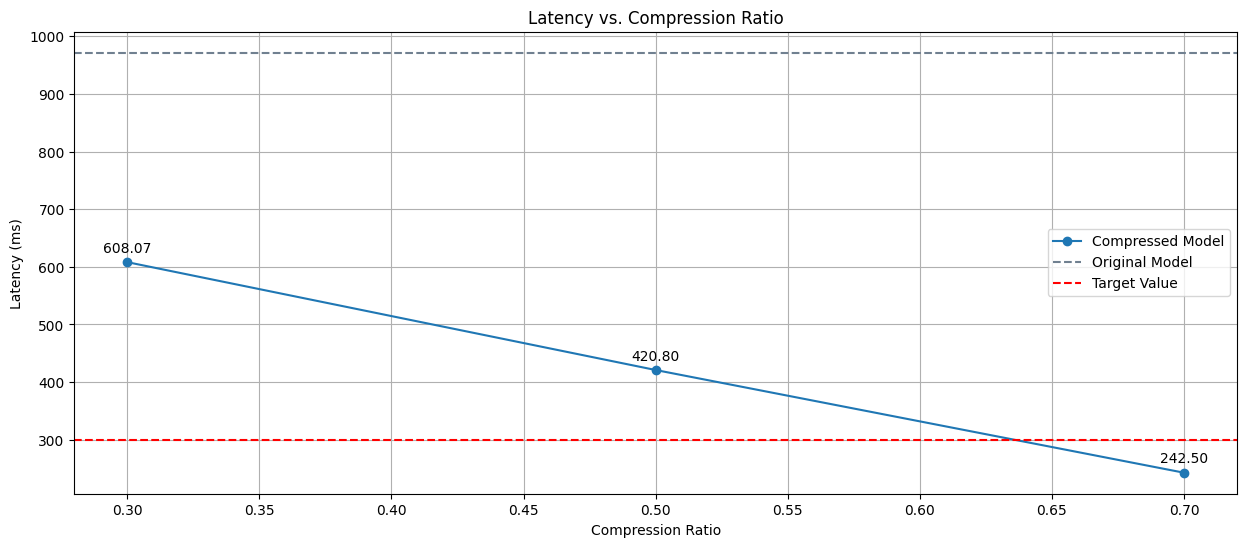

In [ ]:
original_latency = original_benchmark_result.benchmark_result.latency
compressed_latency = {ratio : benchmark_results[ratio].benchmark_result.latency for ratio in ratios}
Plotter.compare_latency(original_latency=original_latency, latency_per_model=compressed_latency, target_latency=300)

The compression ratio of **0.7** meet our **target latency of 300 ms**.

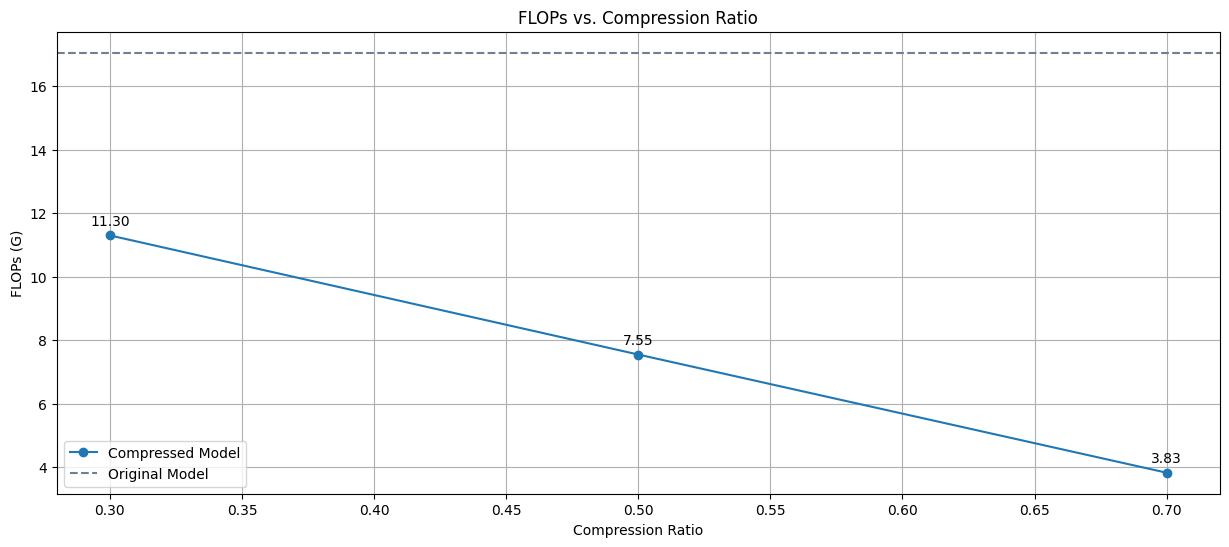

In [ ]:
original_flops = compressed_results[0.3].results.original_model.flops
compressed_flops = {ratio : compressed_results[ratio].results.compressed_model.flops for ratio in ratios}
Plotter.compare_flops(original_flops=original_flops, flops_per_model=compressed_flops)

# 4. Retrain the compressed model

Then, we will retrain the compressed model with **ratio=0.7** and check the performance.

## 4-1. Train the compressed model

In [ ]:
selected_pruning_ratio = 0.7 # The minimum pruning ratio required to achieve the target latency.

hparams_yaml = trained_result.hparams
compressed_model_path = compressed_results[selected_pruning_ratio].compressed_model_path

retrainer = netspresso.trainer(yaml_path=hparams_yaml)

retrainer.set_fx_model(fx_model_path=compressed_model_path)
retrainer.set_training_config(
    epochs=25,
    batch_size=32,
    optimizer=AdamW(lr=6e-5),
    scheduler=CosineAnnealingWarmRestartsWithCustomWarmUp(warmup_epochs=10),
)
project_name = "retraining_sample"
retrained_result = retrainer.train(gpus="0", project_name=project_name)

2025-05-17 12:42:34.439 | INFO     | netspresso.utils.file:create_unique_folder:82 - The folder has been created. Local Path: outputs/retraining_sample
2025-05-17 12:42:34.441 | INFO     | netspresso.utils.metadata.handler:save_json:65 - JSON file saved at /content/outputs/retraining_sample/metadata.json
2025-05-17 12:42:34.509 | INFO     | netspresso_trainer.trainer_common:train_common:50 - Task: detection | Model: yolox_s | Training with torch.fx model? False
2025-05-17 12:42:34.510 | INFO     | netspresso_trainer.trainer_common:train_common:51 - Result will be saved at outputs/retraining_sample/version_0
2025-05-17 12:42:34.511 | INFO     | netspresso_trainer.dataloaders.builder:build_dataset:97 - ----------------------------------------
2025-05-17 12:42:34.512 | INFO     | netspresso_trainer.dataloaders.builder:build_dataset:98 - Loading data...
2025-05-17 12:42:34.640 | INFO     | netspresso_trainer.dataloaders.builder:loaded_dataset_check:72 - Summary | Dataset: <traffic_sign_con

============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



2025-05-17 12:53:25.379 | INFO     | netspresso_trainer.pipelines.train:save_summary:382 - [Model stats] | Sample input: (1, 3, 512, 512) | Params: 8.94M | FLOPs: 17.05G
2025-05-17 12:53:25.382 | INFO     | netspresso_trainer.pipelines.train:save_summary:395 - Model training summary saved at outputs/retraining_sample/version_0/training_summary.json
2025-05-17 12:53:25.992 | INFO     | netspresso.clients.auth.v2.client:login:35 - Login successfully
2025-05-17 12:53:25.994 | INFO     | netspresso.clients.auth.client:validate_token:56 - The token has expired. the token has been reissued.
2025-05-17 12:53:25.994 | INFO     | netspresso.clients.launcher.v2.converter:read_framework_options:175 - Request Convert options
2025-05-17 12:53:26.308 | INFO     | netspresso.clients.launcher.v2.converter:read_framework_options:180 - Request Convert Task Options by model_framework: ResponseConvertFrameworkOptionItems(data=[ModelOption(framework='tensorrt', display_framework='TensorRT', devices=[Device

# 5. Comparison of performance metric between original model and compressed model

The comparison between the original model and the compressed model is depicted in the plot, illustrating their performance across different metrics.

Each subplot corresponds to a specific metric (**mAP50**, **mAP75**, **mAP50_95**).

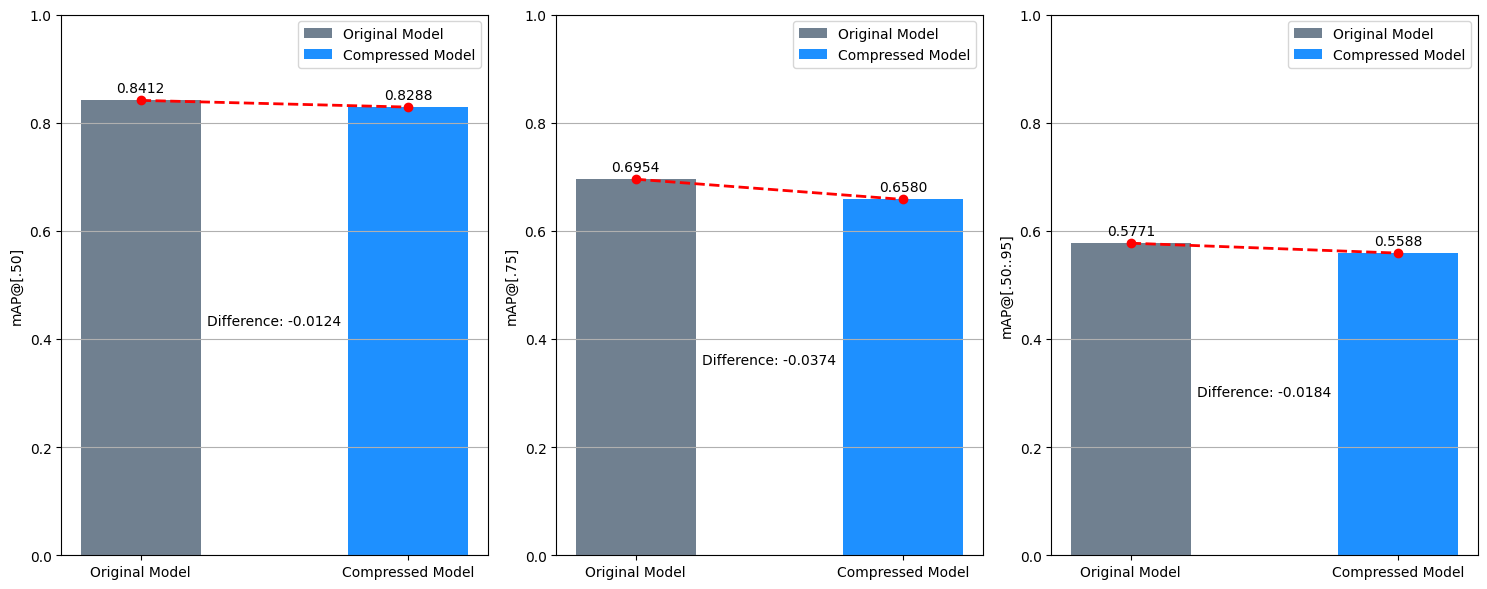

In [ ]:
Plotter.compare_metric(trained_result, retrained_result)

Each subplot corresponds to a specific proflie result (**FLOPs(M)**, **Num of Params(M)**, **Model Size(MB)**).

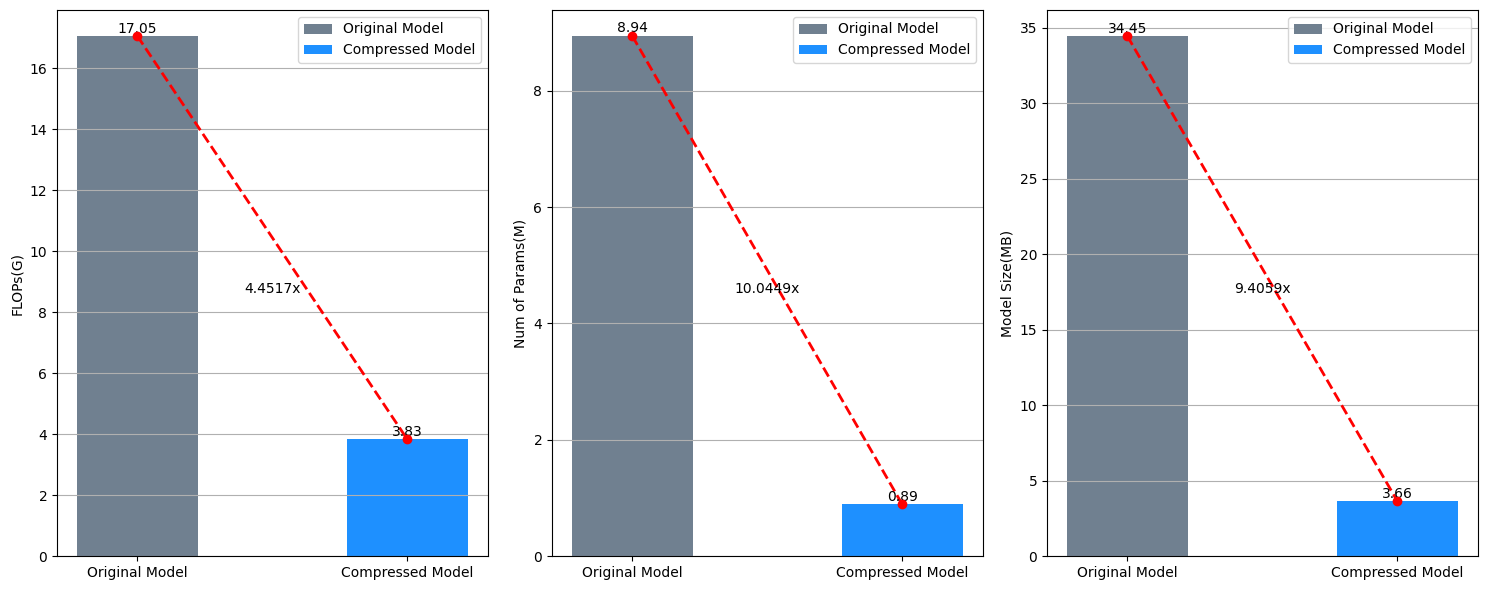

In [ ]:
Plotter.compare_profile_result(compressed_results[selected_pruning_ratio])

# 6. Inference the optimized model

## 6-1. Convert the retrained model

In [ ]:
from netspresso.enums import Framework, DeviceName

converter = netspresso.converter_v2()

retrained_converted_result = converter.convert_model(
    input_model_path=retrained_result.best_onnx_model_path,
    output_dir=f"./outputs/{project_name}/converted/retrained_model_tflite",
    target_framework=Framework.TENSORFLOW_LITE,
    target_device_name=DeviceName.RASPBERRY_PI_4B,
)

2025-05-17 12:53:27.004 | INFO     | netspresso.utils.file:create_unique_folder:82 - The folder has been created. Local Path: outputs/retraining_sample/converted/retrained_model_tflite
2025-05-17 12:53:27.005 | INFO     | netspresso.clients.launcher.v2.benchmarker:read_framework_options:157 - Request Benchmark options
2025-05-17 12:53:27.317 | INFO     | netspresso.clients.launcher.v2.benchmarker:read_framework_options:162 - Request Benchmark Task Options by model_framework: ResponseBenchmarkFrameworkOptionItems(data=[ModelOption(framework='tensorflow_lite', display_framework='Tensorflow Lite', devices=[DeviceInfo(device_name='Arm Virtual Hardware Ethos-U Series', display_device_name='Arm Virtual Hardware Corstone-300 (Ethos-U55/U65)', display_brand_name='Arm', software_versions=[], data_types=['INT8'], hardware_types=[]), DeviceInfo(device_name='Ensemble-E7-DevKit-Gen2', display_device_name='Alif Ensemble DevKit-E7 Gen2 (Arm Cortex-M55+Ethos-U55)', display_brand_name='Arm', software_v

## 6-2. Inference the converted model

In [ ]:
from pathlib import Path
from glob import glob

# 1. Declare inferencer
config_path = trained_result.runtime
input_model_path = retrained_converted_result.converted_model_path
inferencer = netspresso.np_inferencer(config_path=config_path, input_model_path=input_model_path)

# 2. Inference image
valid_imgs = glob("./traffic-sign/images/valid/*.jpg")

img_path = valid_imgs[15]

save_path = f"{Path(input_model_path).parent}/inference_results/{Path(img_path).name}"
outputs = inferencer.inference(img_path, save_path)

2025-05-17 12:54:50.558 | INFO     | netspresso_inference_package.inference.inference_service:set_model_obj:39 - /content/outputs/retraining_sample/converted/retrained_model_tflite/retrained_model_tflite.tflite has 3 nodes for output layer
2025-05-17 12:54:50.917 | INFO     | netspresso.inferencer.inferencer:save_image:71 - Result image saved at /content/outputs/retraining_sample/converted/retrained_model_tflite/inference_results/00228.jpg.


## 6-3. Visualize the inference result

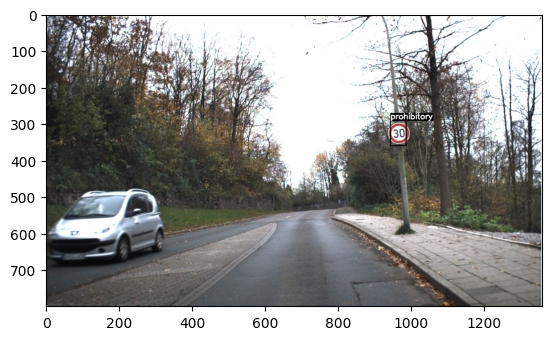

In [ ]:
inferencer.visualizer.visualize_by_plt(outputs)